# Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 1.0)

%matplotlib inline

# Set Options For Display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings("ignore")

# Loading The Dataset

In [23]:
df = pd.read_csv("creditcard_2023.csv")

# EDA

In [24]:
#removing id column
df.drop(columns = "id", inplace = True)

In [25]:
#reading first 10 rows of the data
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.26,-0.47,2.50,-0.08,0.13,0.73,0.52,-0.13,0.73,0.64,-0.99,0.29,-0.94,0.55,1.80,0.22,0.51,0.33,0.12,0.09,-0.11,0.22,-0.13,0.17,0.13,-0.43,-0.08,-0.15,17982.10,0
1,0.99,-0.36,0.56,-0.43,0.28,0.43,0.41,-0.13,0.35,0.53,0.14,1.56,0.57,0.63,0.71,0.79,0.40,0.20,-0.34,-0.23,-0.19,-0.61,0.08,-0.58,0.19,0.30,-0.25,-0.06,6531.37,0
2,-0.26,-0.95,1.73,-0.46,0.07,1.42,0.74,-0.10,-0.26,0.69,-0.27,0.66,0.81,0.62,3.07,-0.58,0.89,0.24,-2.37,0.36,-0.01,0.70,0.95,-1.15,-0.61,-0.31,-0.30,-0.24,2513.54,0
3,-0.15,-0.51,1.75,-1.09,0.25,1.14,0.52,-0.07,-0.21,0.58,-0.75,0.74,0.59,0.56,-0.70,-0.03,0.24,2.18,-1.35,-0.38,-0.15,-0.04,-0.21,-1.89,1.00,-0.52,-0.17,0.05,5384.44,0
4,-0.21,-0.17,1.53,-0.45,0.11,0.53,0.66,-0.21,1.05,0.97,-1.20,1.03,1.44,0.24,0.15,0.22,0.37,0.29,0.45,0.25,-0.11,0.73,-0.16,0.31,-0.41,1.07,0.02,0.42,14278.97,0
5,0.03,-0.14,1.19,-0.71,0.43,0.46,0.61,-0.09,0.18,0.45,0.04,0.88,-0.29,0.63,0.56,0.74,0.42,0.36,-0.24,-0.08,-0.19,-0.54,-0.05,-0.63,-0.46,0.25,0.07,0.10,6901.49,0
6,1.02,-0.40,0.50,-0.14,0.33,0.63,0.43,-0.13,0.80,0.56,-1.74,0.52,-0.69,0.80,0.01,0.23,0.44,-0.03,-0.25,-0.39,-0.17,-0.29,-0.18,-1.30,1.18,-0.60,-0.20,-0.09,18954.45,0
7,-0.05,-0.01,1.14,-0.88,0.68,0.71,0.89,-0.91,0.90,1.26,-1.04,0.82,1.85,0.18,0.77,0.42,0.11,0.10,0.06,-0.32,0.62,-0.92,0.03,-1.09,-0.74,-0.10,-1.38,-2.75,12298.23,0
8,-0.13,-0.35,0.43,-0.76,1.70,2.32,0.57,0.05,0.27,0.44,-1.11,0.55,-0.22,0.74,-0.39,0.35,0.29,0.40,0.26,-0.11,-0.13,-0.28,-0.23,2.25,0.53,-0.93,-0.22,0.24,22052.90,0
9,0.06,-0.09,1.12,-0.74,0.47,0.33,0.68,-0.14,0.10,0.45,-0.10,1.32,1.10,0.49,0.12,1.02,0.28,0.67,0.16,0.04,-0.20,-0.60,-0.15,-0.65,-0.20,0.23,0.06,0.10,210.35,0


In [26]:
#data types in the data
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [27]:
# checking if the data is unbalanced
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [28]:
#null values
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [30]:
#statistical measures
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,12041.96,0.50
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6919.64,0.50
min,-3.50,-49.97,-3.18,-4.95,-9.95,-21.11,-4.35,-10.76,-3.75,-3.16,-5.95,-2.02,-5.96,-2.11,-3.86,-2.21,-2.48,-2.42,-7.80,-78.15,-19.38,-7.73,-30.30,-4.07,-13.61,-8.23,-10.50,-39.04,50.01,0.00
25%,-0.57,-0.49,-0.65,-0.66,-0.29,-0.45,-0.28,-0.19,-0.57,-0.59,-0.70,-0.83,-0.70,-0.87,-0.62,-0.72,-0.62,-0.56,-0.57,-0.35,-0.17,-0.49,-0.24,-0.65,-0.55,-0.63,-0.30,-0.23,6054.89,0.00
50%,-0.09,-0.14,0.00,-0.07,0.08,0.08,0.23,-0.11,0.09,0.26,-0.04,0.16,0.02,0.23,-0.04,0.13,0.27,0.09,-0.03,-0.12,-0.04,-0.03,-0.06,0.02,-0.01,-0.01,-0.17,-0.01,12030.15,0.50
75%,0.83,0.34,0.63,0.71,0.44,0.50,0.53,0.05,0.56,0.59,0.75,0.74,0.69,0.75,0.67,0.66,0.52,0.54,0.56,0.25,0.15,0.46,0.16,0.70,0.55,0.67,0.33,0.41,18036.33,1.00
max,2.23,4.36,14.13,3.20,42.72,26.17,217.87,5.96,20.27,31.72,2.51,17.91,7.19,19.17,14.53,46.65,6.99,6.78,3.83,29.87,8.09,12.63,31.71,12.97,14.62,5.62,113.23,77.26,24039.93,1.00


In [31]:
#shape of the data
df.shape

(568630, 30)

In [32]:
#duplicated lines
df.duplicated().sum()

1

In [33]:
#correlation between the numerical columns
df.iloc[:, : -1].corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.00,-0.56,0.48,-0.50,0.52,0.35,0.57,-0.23,0.55,0.60,-0.53,0.58,-0.02,0.49,0.05,0.62,0.61,0.58,-0.38,-0.22,-0.03,-0.07,-0.07,-0.01,-0.01,0.01,-0.12,0.07,-0.00
V2,-0.56,1.00,-0.63,0.58,-0.63,-0.34,-0.69,0.19,-0.59,-0.62,0.56,-0.57,0.01,-0.52,-0.16,-0.53,-0.50,-0.48,0.21,0.26,-0.01,0.04,0.15,-0.03,0.13,0.01,0.05,0.02,-0.00
V3,0.48,-0.63,1.00,-0.69,0.51,0.51,0.63,-0.26,0.65,0.71,-0.69,0.71,-0.02,0.67,0.10,0.61,0.58,0.53,-0.31,-0.25,-0.02,-0.04,-0.06,0.08,-0.08,-0.05,-0.19,0.01,-0.00
V4,-0.50,0.58,-0.69,1.00,-0.43,-0.47,-0.59,0.20,-0.68,-0.71,0.71,-0.72,0.01,-0.71,-0.10,-0.59,-0.53,-0.48,0.27,0.26,-0.01,0.09,0.04,-0.10,0.03,0.14,0.19,-0.01,0.00
V5,0.52,-0.63,0.51,-0.43,1.00,0.25,0.59,-0.31,0.48,0.56,-0.44,0.47,-0.12,0.39,0.06,0.60,0.67,0.65,-0.44,-0.25,0.03,-0.12,-0.11,-0.08,-0.05,0.05,-0.04,0.11,-0.00
V6,0.35,-0.34,0.51,-0.47,0.25,1.00,0.42,-0.60,0.43,0.47,-0.50,0.50,-0.12,0.51,-0.02,0.42,0.38,0.33,-0.24,-0.19,-0.04,0.04,0.31,-0.01,-0.20,-0.07,-0.26,-0.07,0.00
V7,0.57,-0.69,0.63,-0.59,0.59,0.42,1.00,-0.18,0.60,0.68,-0.59,0.60,-0.03,0.54,0.14,0.67,0.66,0.63,-0.37,-0.30,0.02,-0.10,-0.11,-0.00,0.00,-0.01,-0.04,0.04,0.00
V8,-0.23,0.19,-0.26,0.20,-0.31,-0.60,-0.18,1.00,-0.21,-0.20,0.22,-0.21,0.27,-0.22,0.10,-0.23,-0.28,-0.25,0.25,0.13,0.06,-0.10,-0.46,0.08,0.32,0.04,0.30,0.05,-0.00
V9,0.55,-0.59,0.65,-0.68,0.48,0.43,0.60,-0.21,1.00,0.75,-0.63,0.67,-0.01,0.63,0.11,0.57,0.58,0.52,-0.29,-0.33,0.13,-0.20,-0.04,0.04,-0.03,-0.13,-0.11,0.07,-0.00
V10,0.60,-0.62,0.71,-0.71,0.56,0.47,0.68,-0.20,0.75,1.00,-0.71,0.74,-0.02,0.70,0.11,0.69,0.65,0.60,-0.38,-0.29,0.04,-0.15,-0.06,0.05,-0.01,-0.05,-0.13,0.04,-0.00


<Axes: >

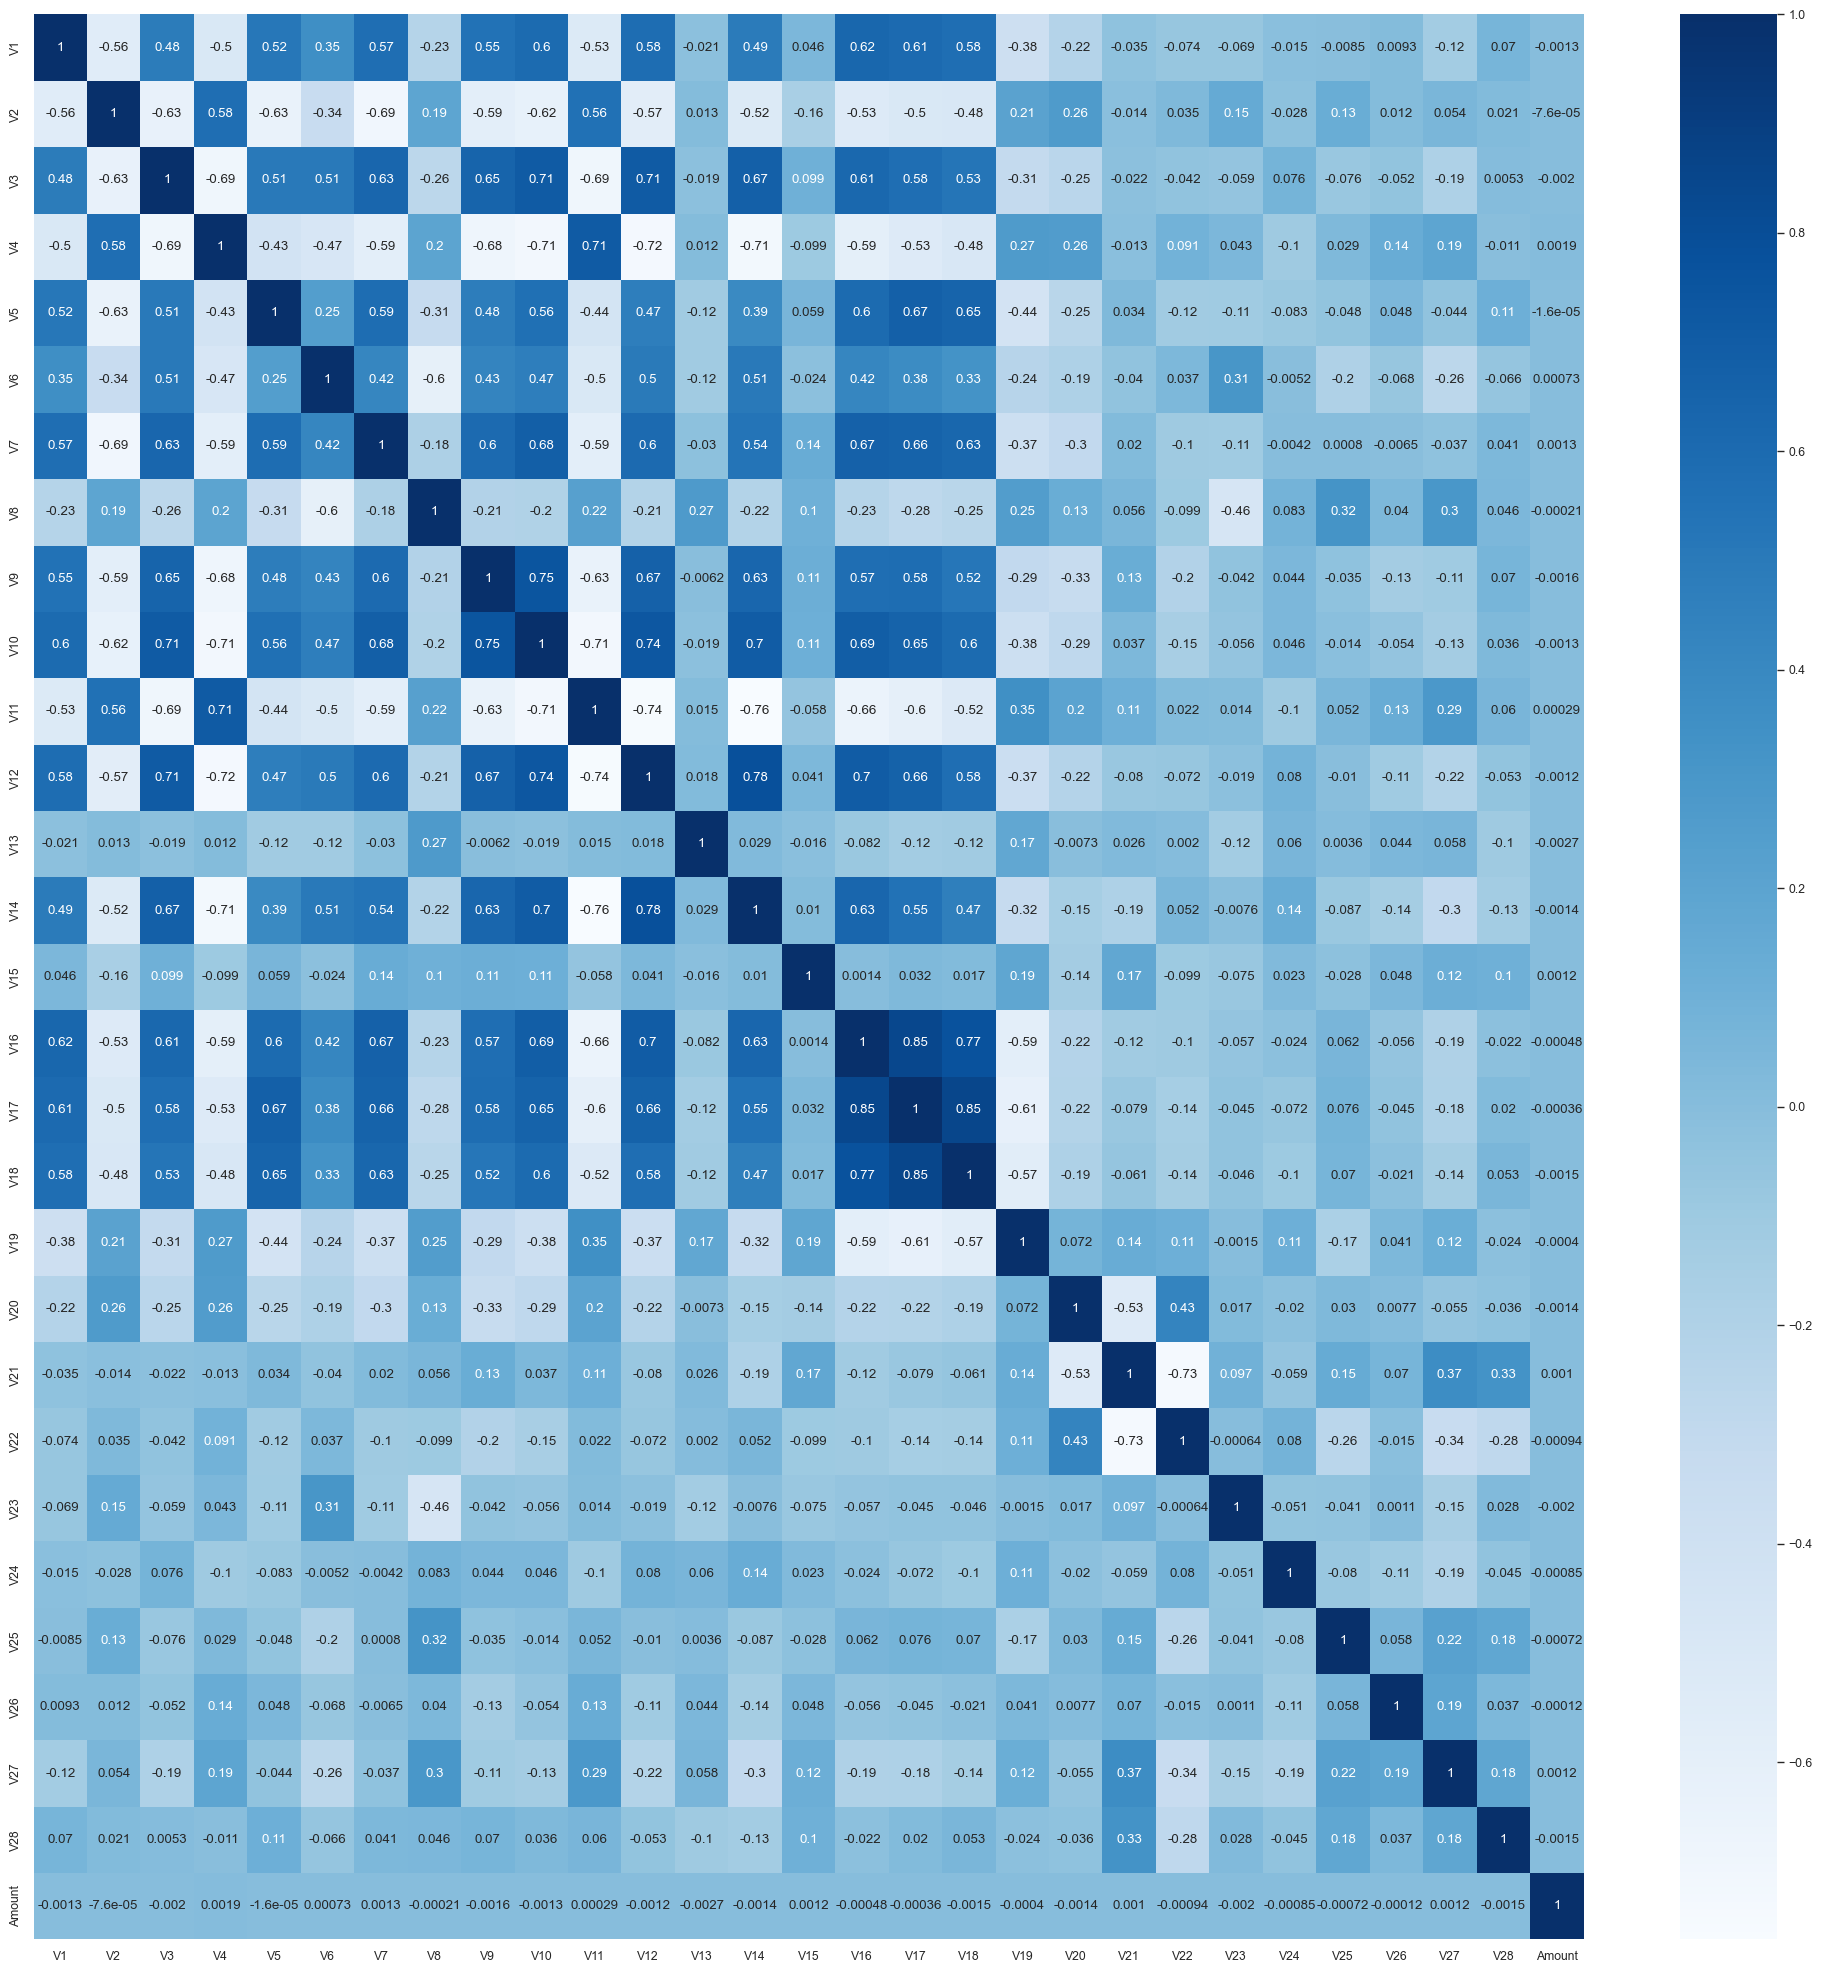

In [34]:
#heatmap for clear image of correlation
plt.figure(figsize = (25, 25))
sns.heatmap(df.iloc[:, : -1].corr(), annot = True, cbar = True, cmap = "Blues")

# Data Preprocessing

In [35]:
#removing the duplicated column
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [36]:
#store the features in variable for modelling
x = df.drop("Class", axis = 1)
x = x.values

In [37]:
#scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [38]:
x

array([[-0.26065124, -0.46964626,  2.49626496, ..., -0.08122751,
        -0.15104218,  0.85845059],
       [ 0.98509839, -0.35604232,  0.55805445, ..., -0.24804966,
        -0.06450834, -0.79636755],
       [-0.26027505, -0.94938484,  1.72853634, ..., -0.30025569,
        -0.24471522, -1.37700984],
       ...,
       [-0.31200091, -0.00409024,  0.13752352, ..., -0.48753763,
        -0.26873834,  1.66640559],
       [ 0.63686861, -0.51696756, -0.30089077, ..., -0.15926675,
        -0.07624703, -0.2718511 ],
       [-0.7951485 ,  0.43324285, -0.64914243, ..., -1.57511178,
         0.7229426 ,  1.36596614]])

# Modelling

In [39]:
#finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

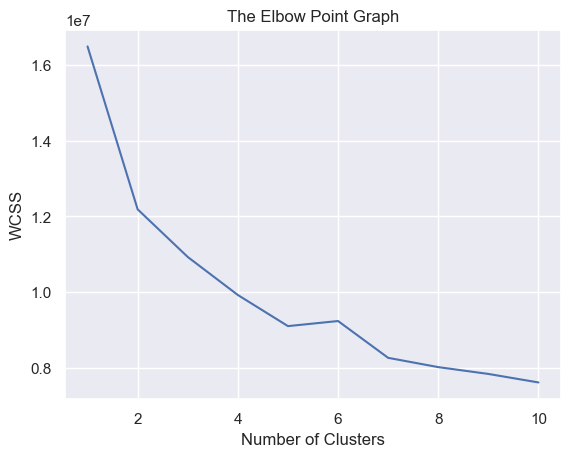

In [40]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#optimal number of clusters is 7

In [41]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0)

#return a label for each data point based on their cluster
y = kmeans.fit_predict(x)

print(y)

[3 3 3 ... 6 3 6]


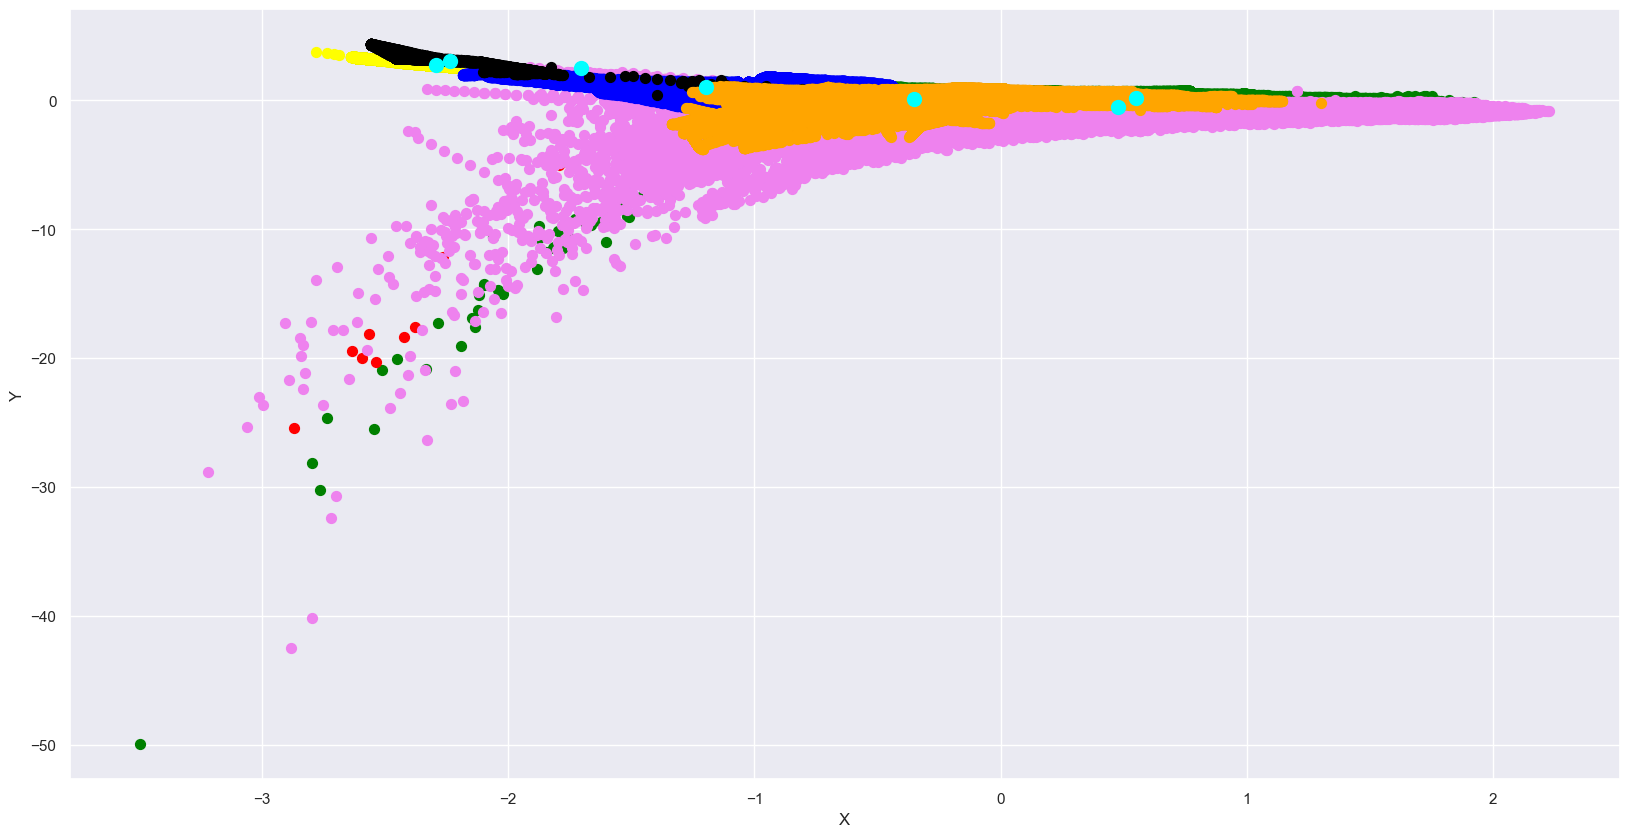

In [42]:
#plotting all the clusters and their Centroids

plt.figure(figsize=(20,10))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(x[y==5,0], x[y==5,1], s=50, c='black', label='Cluster 6')
plt.scatter(x[y==6,0], x[y==6,1], s=50, c='orange', label='Cluster 7')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()